In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Importing the dataset
df1 = pd.read_csv('Disease Prediction Training.csv')

In [3]:
df1.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0
3,50,male,172,110.0,130,80,normal,normal,1,0,1,0
4,39,female,162,61.0,110,80,high,high,0,0,1,0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


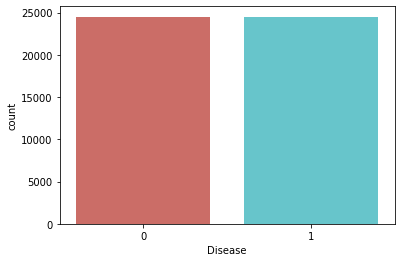

In [4]:
import seaborn as sns
df1.Disease.value_counts()
sns.countplot(x = 'Disease', data = df1, palette = 'hls')
plt.show()

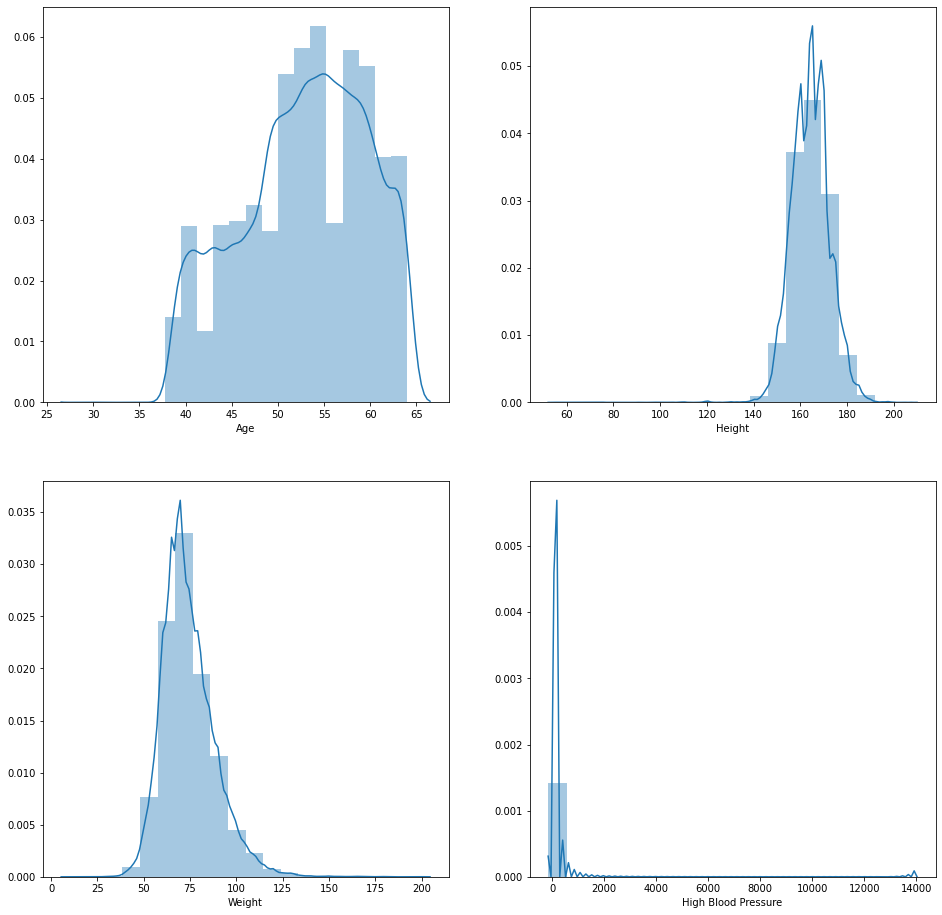

In [5]:
fig, ax = plt.subplots(2,2, figsize=(16,16))
sns.distplot(df1.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df1.Height, bins = 20, ax=ax[0,1]) 
sns.distplot(df1.Weight, bins = 20, ax=ax[1,0]) 
sns.distplot(df1["High Blood Pressure"], bins = 20, ax=ax[1,1]) 


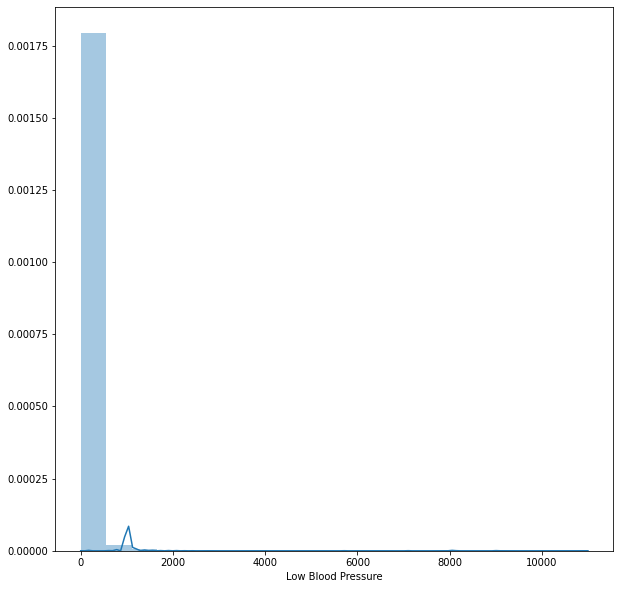

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.distplot(df1["Low Blood Pressure"], bins = 20)


The variables Hight bllod presuure and low blood pressure have high skeness in the distribution and also the outliers have no meaning in this case. A person canot have values of low blood pressure and high blood poresuure in thousands and hence these two variables have lot outliers which are errors and hence we have to use some techniques to treate outliers from both of them.

In [7]:
data = df1
arr = ["Height","Weight", "High Blood Pressure", "Low Blood Pressure"]

for i in arr:
    IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
    upper_bound = data[i].quantile(0.75) + (IQR * 1.5)
    lower_bound = data[i].quantile(0.25) - (IQR * 1.5)
    max_val = data[i].max()
    min_val = data[i].min()
    median_val = np.median(data[i])
    print("upper bound of :"+i , upper_bound)
    print("lower bound of :"+i,lower_bound )
    print("maximum value in dataset of :"+i, max_val)
    print("median value in dataset of :"+i, median_val)

upper bound of :Height 186.5
lower bound of :Height 142.5
maximum value in dataset of :Height 207
median value in dataset of :Height 165.0
upper bound of :Weight 107.5
lower bound of :Weight 39.5
maximum value in dataset of :Weight 200.0
median value in dataset of :Weight 72.0
upper bound of :High Blood Pressure 170.0
lower bound of :High Blood Pressure 90.0
maximum value in dataset of :High Blood Pressure 14020
median value in dataset of :High Blood Pressure 120.0
upper bound of :Low Blood Pressure 105.0
lower bound of :Low Blood Pressure 65.0
maximum value in dataset of :Low Blood Pressure 11000
median value in dataset of :Low Blood Pressure 80.0


If we observe the above results the median value and maximum value of features height and weight for feature height which has standard deviation of approx 7, the max value is 8 standard deviations more , which is not too bad because there can be some very tall people in our population and these outliers may not be wrong observations. same is the case with feature weight, whose max value is 9 standard deviations more than median which also is possible because some patients may have over weight problem.

But when it come to High bllod pressure , max value is 16020 and median is 120, which is definitely something wrong. a patient canot have 16000 as his blood pressure value. from box plot we can observe that many outliers ate close to this value of 16000, which means all these values are erros similarly for low blood pressure the max value is 11000 where as median is 80, and from box plot observations many other outliers are close to this max value. even there very high values are erros because humans canot have such high values as low blood pressures.

Therefore for both High blood pressure and low pressure i will be treating my outliers by imputing any values more than the upper bound and less than the lowerbound by median values of their respective columns

Therefore for both High blood pressure and low pressure i will be treating my outliers by imputing any values more than the upper bound and less than the lowerbound by median values of their respective columns

In [0]:
data.loc[data['High Blood Pressure'] > 170, 'High Blood Pressure'] = 120
data.loc[data['High Blood Pressure'] < 90, 'High Blood Pressure'] = 120

data.loc[data['Low Blood Pressure'] > 105, 'Low Blood Pressure'] = 80
data.loc[data['Low Blood Pressure'] < 65, 'Low Blood Pressure'] = 80

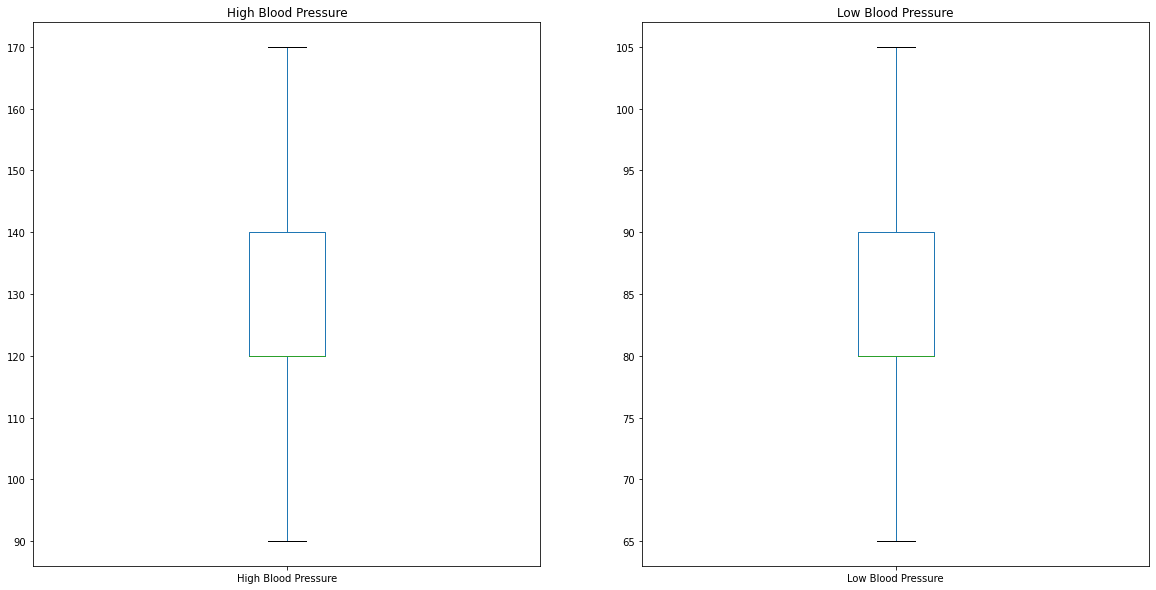

In [9]:
fig = plt.figure(figsize=(20,10))


#  subplot #2
fig.add_subplot(1,2,1)
data['High Blood Pressure'].plot.box(title= 'High Blood Pressure')


#  subplot #2
fig.add_subplot(1,2,2)
data['Low Blood Pressure'].plot.box(title= 'Low Blood Pressure')

plt.show()

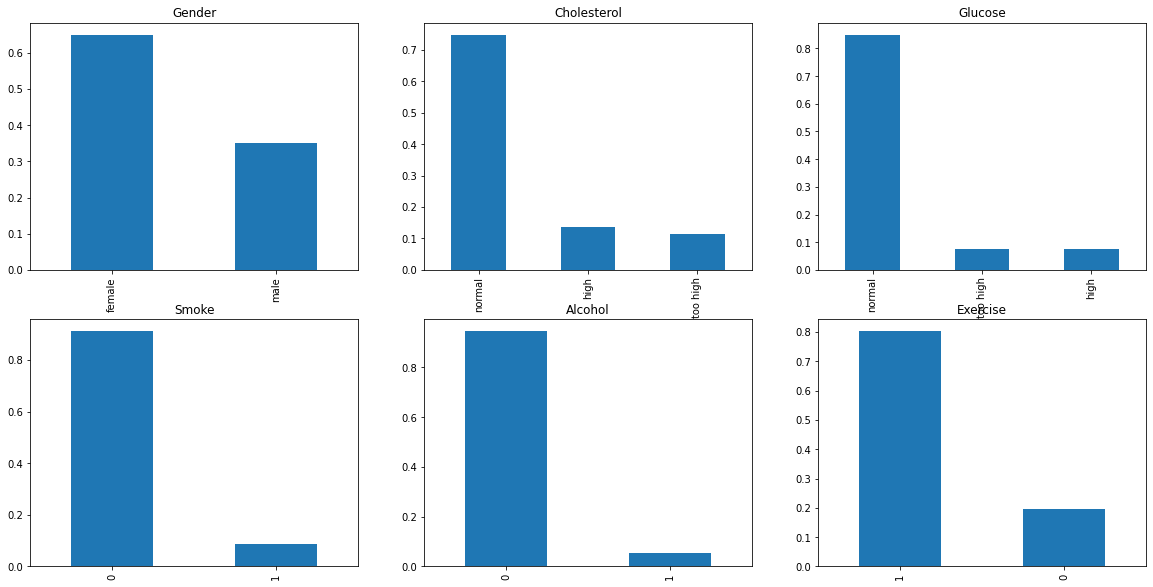

In [10]:
fig = plt.figure(figsize=(14,12))

#  subplot #1
fig.add_subplot(231)
plt.title('Gender', fontsize=14)
df1['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

#  subplot #2
fig.add_subplot(2,3,2)
df1['Cholesterol'].value_counts(normalize=True).plot.bar(title= 'Cholesterol')

#  subplot #3
fig.add_subplot(233)
df1['Glucose'].value_counts(normalize=True).plot.bar(title= 'Glucose') 

fig.add_subplot(234)
df1['Smoke'].value_counts(normalize=True).plot.bar(title= 'Smoke') 

fig.add_subplot(235)
df1['Alcohol'].value_counts(normalize=True).plot.bar(title= 'Alcohol') 

fig.add_subplot(236)
df1['Exercise'].value_counts(normalize=True).plot.bar(title= 'Exercise') 



plt.show()

It can be inferred from the above bar plots that:

65% patients in the dataset are male.

Around 75% of the patients in the dataset have normal cholestral.

Around 85% patients in the dataset have normal glucose.

Around 10 % patients in the dataset smoke.

Around 5% patients in the dataset drink alcohol.

Around 80% patients in the dataset exercise.

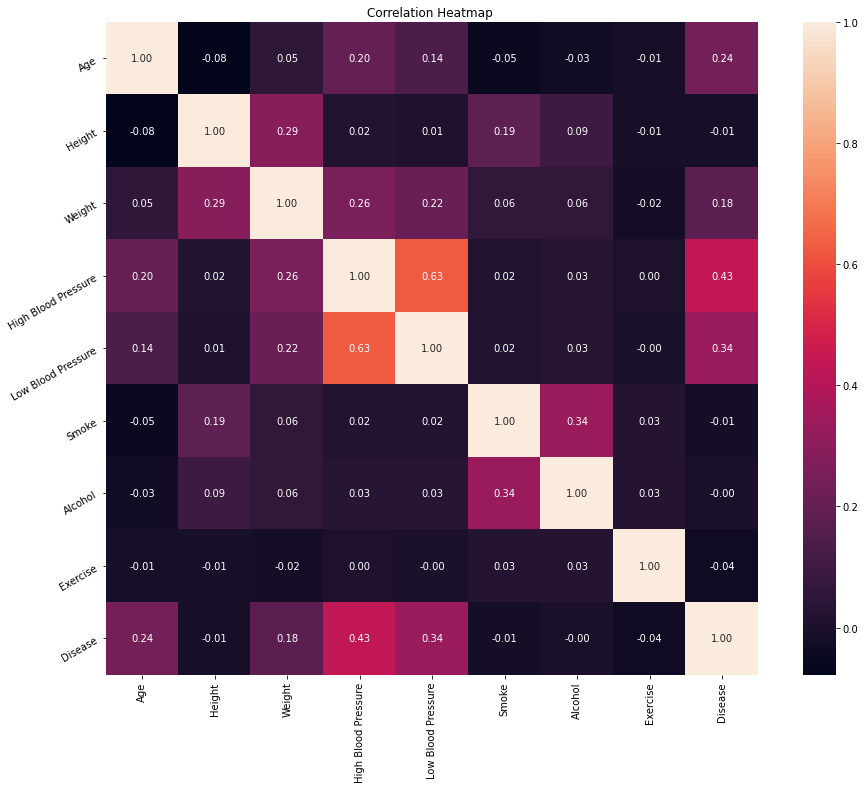

In [11]:
correlation = data.corr()

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap ')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [0]:
df1 = data

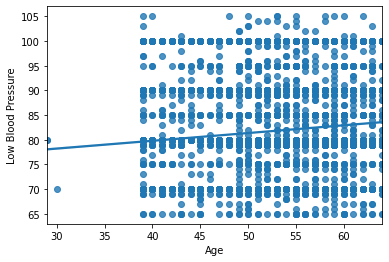

In [13]:
sns.regplot(x='Age', y= 'Low Blood Pressure', data=df1)

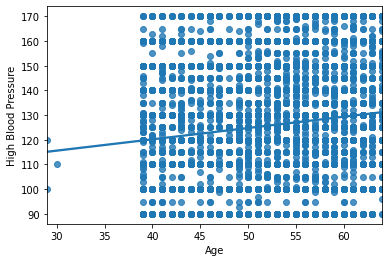

In [14]:
sns.regplot(x='Age', y= 'High Blood Pressure', data=df1)

**we can see from the about plot that our data set is balanced**

**Pre-processing Steps**
1. Filling the missing values
2. Converting categories to numbers
3. Bring all the variables in range 0 to 1

In [15]:
# shape of the data
df1.shape

(49000, 12)

In [16]:
# checking missing values in the data
df1.isnull().sum()

Age                    0
Gender                 0
Height                 0
Weight                 0
High Blood Pressure    0
Low Blood Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
Disease                0
dtype: int64

**since there are no missing values in our data we are not doing any missing** **value imputations.**

In [17]:
# checking data types of the variables
df1.dtypes

Age                      int64
Gender                  object
Height                   int64
Weight                 float64
High Blood Pressure      int64
Low Blood Pressure       int64
Cholesterol             object
Glucose                 object
Smoke                    int64
Alcohol                  int64
Exercise                 int64
Disease                  int64
dtype: object

**we have three colums which are categorical they are "Gender", "Cholesterol"** **and "Glucose". now we will convert them to numerical variables.**


In [18]:
# checking the distinct values in each of the categorical fields
print("unique values of cholestrol variable are: ",df1.Cholesterol.unique())
print("unique values of Gender variable are: ",df1.Gender.unique())
print("unique values of Glucose variable are: ",df1.Glucose.unique())

unique values of cholestrol variable are:  ['normal' 'high' 'too high']
unique values of Gender variable are:  ['female' 'male']
unique values of Glucose variable are:  ['normal' 'high' 'too high']


In [19]:
# renaming "too high" value in chloestrol and glucose columns as "toohigh" with out space
df1["Cholesterol"].replace({"too high": "toohigh"}, inplace=True)
df1["Glucose"].replace({"too high": "toohigh"}, inplace=True)

print("unique values of cholestrol variable are: ",df1.Cholesterol.unique())
print("unique values of Glucose variable are: ",df1.Glucose.unique())

unique values of cholestrol variable are:  ['normal' 'high' 'toohigh']
unique values of Glucose variable are:  ['normal' 'high' 'toohigh']


In [20]:
# converting categorical to numerical
df1['Gender'] = df1['Gender'].map(dict( male = 0, female = 1 ))
df1['Cholesterol'] = df1['Cholesterol'].map(dict( normal = 0, high = 1, toohigh = 2))
df1['Glucose'] = df1['Glucose'].map(dict( normal = 0, high = 1, toohigh = 2 ))
df1.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,1,167,88.0,130,68,0,0,0,0,1,0
1,64,1,150,71.0,140,100,0,0,0,0,0,1
2,41,1,166,83.0,100,70,0,0,0,1,1,0
3,50,0,172,110.0,130,80,0,0,1,0,1,0
4,39,1,162,61.0,110,80,1,1,0,0,1,0


In [21]:
print("unique values of cholestrol variable are: ",df1.Cholesterol.unique())
print("unique values of Gender variable are: ",df1.Gender.unique())
print("unique values of Glucose variable are: ",df1.Glucose.unique())

unique values of cholestrol variable are:  [0 1 2]
unique values of Gender variable are:  [1 0]
unique values of Glucose variable are:  [0 1 2]


In [22]:
#once again checking the data types of variables to make sure every column is numerical
df1.dtypes

Age                      int64
Gender                   int64
Height                   int64
Weight                 float64
High Blood Pressure      int64
Low Blood Pressure       int64
Cholesterol              int64
Glucose                  int64
Smoke                    int64
Alcohol                  int64
Exercise                 int64
Disease                  int64
dtype: object

In [0]:
#separating training variables and lable
num_vars = df1.select_dtypes(['int64', 'float64']).columns
X = df1.drop(['Disease'], axis=1)
y = df1.Disease

In [0]:
#importing necessary pakages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [25]:
# splitting data for training and validation
# used stratify argument to maintain the balance of target variable in the splits

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=df1['Disease'],test_size=0.4, random_state=10)
X_test.shape

(19600, 11)

In [26]:

y_train.shape

(29400,)

In [27]:

# using standard scalar to scale all the variables between the values 0 and 1 inorder to reduce the computational time and to help our neural network to converge faster.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(29400, 11)

In [28]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10
0,0.603259,0.729471,0.443597,-1.132356,-0.396527,-0.240060,-0.539640,-0.393598,-0.307844,-0.241249,0.49468
1,-1.167122,0.729471,0.688458,-0.992447,-0.396527,-0.240060,-0.539640,-0.393598,-0.307844,-0.241249,0.49468
2,0.013132,0.729471,-0.535845,-0.992447,-0.396527,-0.240060,-0.539640,-0.393598,-0.307844,-0.241249,0.49468
3,0.750791,-1.370857,0.688458,0.406651,0.582766,1.073746,-0.539640,-0.393598,-0.307844,-0.241249,0.49468
4,1.045855,-1.370857,1.178179,2.785116,-0.396527,-0.240060,-0.539640,-0.393598,-0.307844,-0.241249,0.49468
...,...,...,...,...,...,...,...,...,...,...,...
19595,1.045855,-1.370857,2.524911,1.246109,1.562060,1.073746,2.397311,-0.393598,-0.307844,-0.241249,0.49468
19596,-1.167122,-1.370857,-0.780705,0.056876,0.909197,1.073746,-0.539640,-0.393598,3.248394,-0.241249,0.49468
19597,-1.757249,-1.370857,1.178179,1.246109,-0.396527,-0.240060,-0.539640,-0.393598,3.248394,-0.241249,0.49468
19598,-0.576995,-1.370857,0.688458,1.106199,1.562060,2.387553,0.928835,-0.393598,-0.307844,-0.241249,0.49468


**Logistic Regression Base Model**

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
LRModel= LogisticRegression()
LRModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Optimize Recall When:**

1.   You want to limit false negatives
2.   When you want to peanlize FN more than FP 



In [30]:
from sklearn.metrics import precision_score,recall_score
LRModel.fit(X_train,y_train)
LR_pred = LRModel.predict(X_test)
print(recall_score(y_test,LR_pred))

0.6710888866210838


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      9801
           1       0.75      0.67      0.71      9799

    accuracy                           0.72     19600
   macro avg       0.73      0.72      0.72     19600
weighted avg       0.73      0.72      0.72     19600



**Logistic Regression Hyper Parameter tuning**

In [0]:
param_grid = {"C":np.arange(1,100,0.5), "penalty":["l1","l2"],'solver' : ['lbfgs','liblinear'],'max_iter' : [100, 1000,,2500, 5000]}

In [0]:
# grid = GridSearchCV(dt, param_grid_2, cv=3, scoring='recall')
# grid.fit(X_train, y_train)

In [0]:
# param_grid = [    
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#     'max_iter' : [100, 1000,2500, 5000]
#     }
# ]

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
clf = GridSearchCV(LRModel, param_grid = param_grid, cv = 3,scoring='recall', verbose=True, n_jobs=-1)

In [91]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1584 candidates, totalling 4752 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 1698 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 3098 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4752 out of 4752 | elapsed:  2.0min finished


In [92]:
print(best_clf.best_score_)

0.6765759359469445


In [93]:
for hps, values in best_clf.best_params_.items():
  print(f"{hps}: {values}")

C: 7.5
max_iter: 100
penalty: l1
solver: liblinear


In [94]:
best_clf.best_estimator_

LogisticRegression(C=7.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
best_lgmodel = LogisticRegression(C=7.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
from sklearn.metrics import precision_score,recall_score
best_lgmodel.fit(X_train,y_train)
lg_pred = best_lgmodel.predict(X_test)
print(recall_score(y_test,lg_pred))

0.6710888866210838


Predictions of logistic regression 

In [77]:
df2 = pd.read_csv('Disease Prediction Testing.csv')
df2.head()

,ID,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
0,0,44,female,160,59.0,100,80,high,normal,0,0,1
1,1,41,female,169,74.0,120,70,normal,normal,0,0,1
2,2,63,male,168,84.0,120,80,normal,high,0,0,1
3,3,55,female,158,108.0,160,100,normal,normal,0,0,0
4,4,55,female,167,67.0,120,80,normal,normal,0,0,1


In [0]:
# renaming "too high" value in chloestrol and glucose columns as "toohigh" with out space
df2["Cholesterol"].replace({"too high": "toohigh"}, inplace=True)
df2["Glucose"].replace({"too high": "toohigh"}, inplace=True)


In [79]:
df2['Gender'] = df2['Gender'].map(dict( male = 0, female = 1 ))
df2['Cholesterol'] = df2['Cholesterol'].map(dict( normal = 0, high = 1, toohigh = 2))
df2['Glucose'] = df2['Glucose'].map(dict( normal = 0, high = 1, toohigh = 2 ))
df2.head()

,ID,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
0,0,44,1,160,59.0,100,80,1,0,0,0,1
1,1,41,1,169,74.0,120,70,0,0,0,0,1
2,2,63,0,168,84.0,120,80,0,1,0,0,1
3,3,55,1,158,108.0,160,100,0,0,0,0,0
4,4,55,1,167,67.0,120,80,0,0,0,0,1


In [0]:
num_vars = df1.select_dtypes(['int64', 'float64']).columns
ids = df2["ID"]
testing_data = df2.drop(['ID'], axis=1)

In [81]:
testing_data.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
0,44,1,160,59.0,100,80,1,0,0,0,1
1,41,1,169,74.0,120,70,0,0,0,0,1
2,63,0,168,84.0,120,80,0,1,0,0,1
3,55,1,158,108.0,160,100,0,0,0,0,0
4,55,1,167,67.0,120,80,0,0,0,0,1


In [82]:
# using standard scalar to scale all the variables between the values 0 and 1 inorder to reduce the computational time and to help our neural network to converge faster.
scaler = StandardScaler().fit(testing_data)
test_data_scaled = scaler.transform(testing_data)
test_data_scaled.shape

(21000, 11)

In [0]:
final_predictions_lg = best_lgmodel.predict(test_data_scaled)

In [98]:
len(final_predictions_lg)

21000

In [100]:
print(type(ids))
len(ids)


<class 'pandas.core.series.Series'>


21000

In [0]:
pred_df_lg = pd.DataFrame(final_predictions_lg)

In [0]:

ids_df = pd.DataFrame(ids)

In [104]:
submission_df = pd.concat([pred_df_lg, ids_df], axis=1, sort=False)
submission_df.shape

(21000, 2)

In [0]:
submission_df.to_csv('ons_data.csv', index=False)

In [0]:
submission_df.to_csv('ons_lg_assign4_da.csv', index=False)

**Random Forest Base Model**

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
recall_s = recall_score(y_test, predictions)
print(recall_s)

0.6309827533421778


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.64      0.64      9801
           1       0.63      0.63      0.63      9799

    accuracy                           0.63     19600
   macro avg       0.63      0.63      0.63     19600
weighted avg       0.63      0.63      0.63     19600



**Hyperparameter Tuning of decision tree**

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
np.random.seed(66)

In [0]:
param_grid_2 = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [5, 10, 20, 25, 30],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(dt, param_grid_2, cv=3, scoring='recall')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [0]:
print(grid.best_score_)

0.6783435325548876


In [0]:
for hps, values in grid.best_params_.items():
  print(f"{hps}: {values}")

criterion: gini
max_depth: 5
max_leaf_nodes: 10
min_samples_leaf: 1
min_samples_split: 2


In [0]:
best_dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5,max_leaf_nodes= 10,min_samples_leaf= 1, min_samples_split =2)
                                             

In [109]:
best_dt_model.fit(X_train, y_train)
predictions = best_dt_model.predict(X_test)
recall_s = recall_score(y_test, predictions)
print(recall_s)

0.6982345137258904


roc_auc_score for DecisionTree:  0.7815435264633853
roc_auc_score for Logistic Regression:  0.7895086140098773


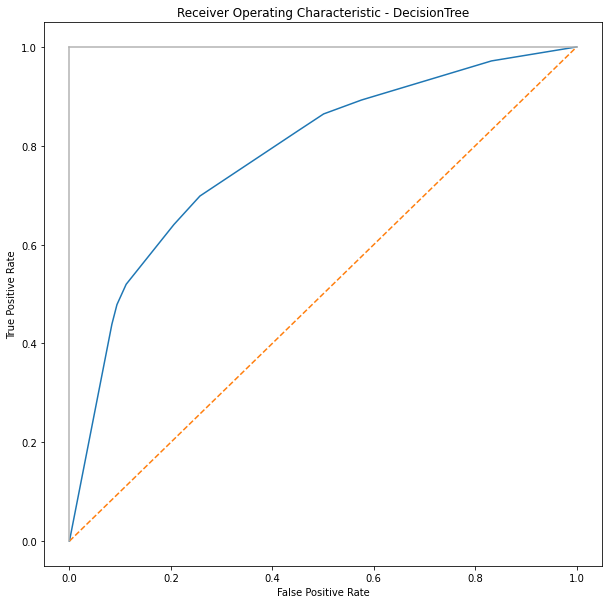

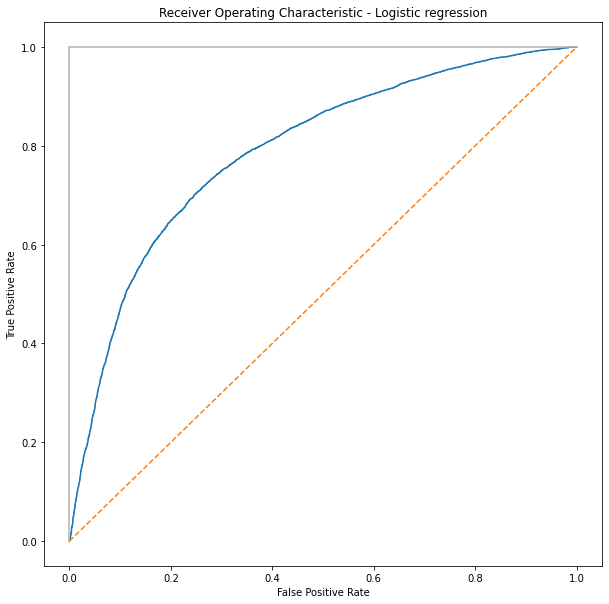

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Get predicted probabilities
y_score1 = best_dt_model.predict_proba(X_test)[:,1]
y_score2 = best_lgmodel.predict_proba(X_test)[:,1]

    # Plot Receiving Operating Characteristic Curve
    # Create true and false positive rates
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

    # Plot ROC curves
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [0]:
from sklearn.tree import plot_tree

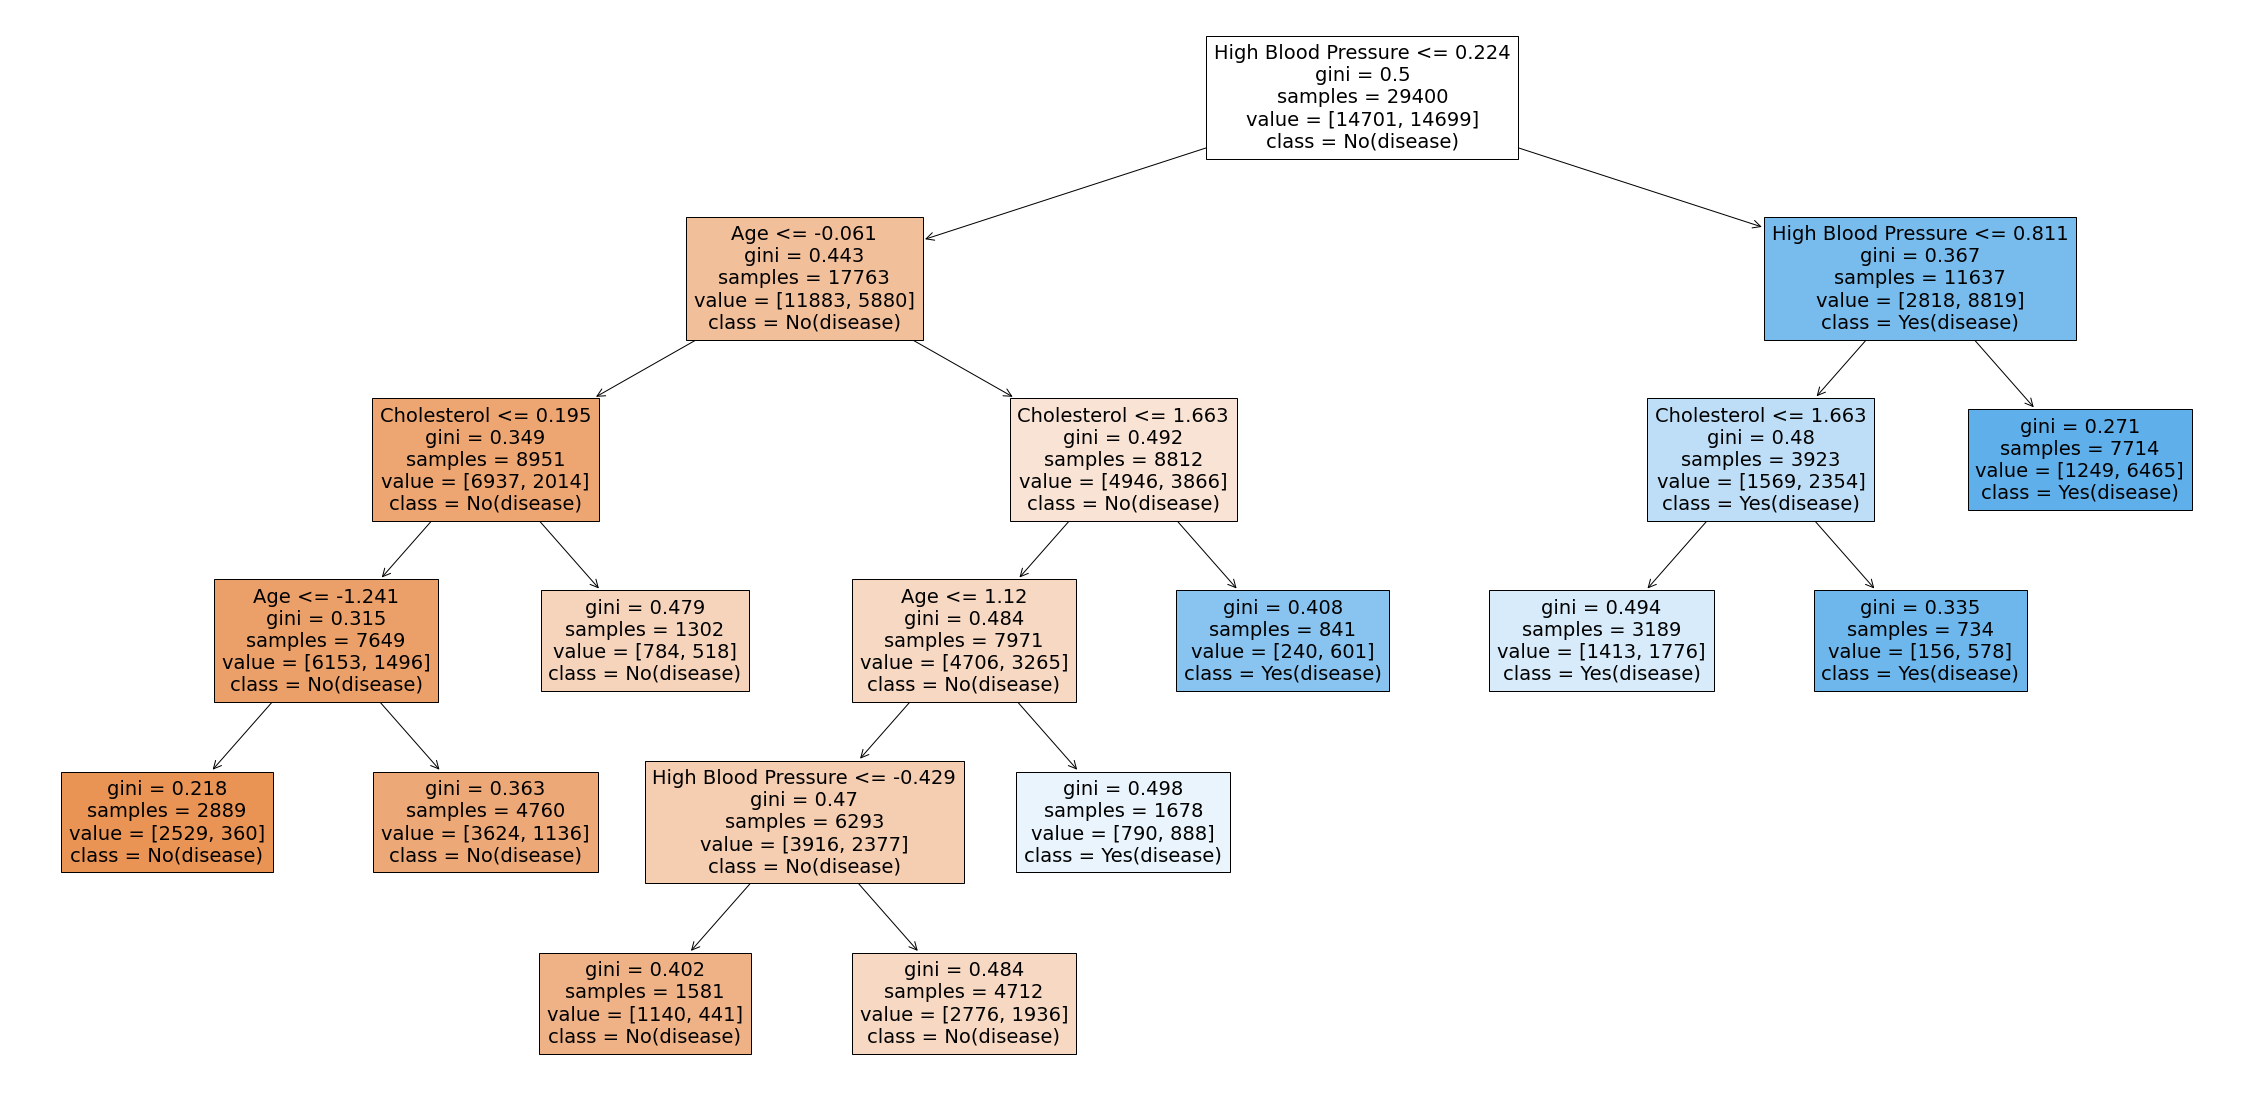

In [0]:
plt.figure(figsize=(40,20))
plot_tree(best_dt_model,filled=True,feature_names=X.columns,class_names=['No(disease)','Yes(disease)'])
plt.show()

Age                    0.138449
Gender                 0.000000
Height                 0.000000
Weight                 0.000000
High Blood Pressure    0.781692
Low Blood Pressure     0.000000
Cholesterol            0.079859
Glucose                0.000000
Smoke                  0.000000
Alcohol                0.000000
Exercise               0.000000
dtype: float64


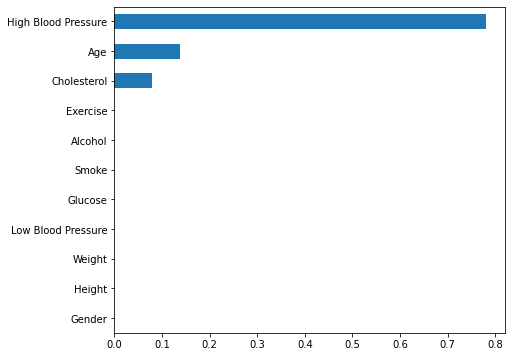

In [0]:
feature_importances = pd.Series(best_dt_model.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

In [0]:
best_dt_model

In [0]:
final_predictions_dt = best_dt_model.predict(test_data_scaled)
pred_df_dt = pd.DataFrame(final_predictions_dt)
ids_df = pd.DataFrame(ids)
submission_df_2 = pd.concat([pred_df_dt, ids_df], axis=1, sort=False)
submission_df_2.to_csv('ons_dt.csv', index=False)

# AdaBoost Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada = {'learning_rate': np.arange(0.02, 0.1, 0.02),
                  'n_estimators': [400, 600, 800, 1000]}
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid_gbm,cv= 3 , scoring='recall', n_jobs= -1, verbose = 2)

In [40]:
grid_ada.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  6.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': array([0.02, 0.04, 0.06, 0.08]),
                         'n_estimators': [400, 600, 800, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=2)

In [41]:
for hps, values in grid_ada.best_params_.items():
  print(f"{hps}: {values}")

learning_rate: 0.08
n_estimators: 1000


In [0]:
ada_model = AdaBoostClassifier(learning_rate =0.08, n_estimators = 1000)

In [44]:
ada_model.fit(X_train, y_train)
predictions_ada = ada_model.predict(X_test)
recall_ada = recall_score(y_test, predictions_ada)
print(recall_ada)

0.6537401775691397


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      9801
           1       0.77      0.65      0.71      9799

    accuracy                           0.73     19600
   macro avg       0.73      0.73      0.73     19600
weighted avg       0.73      0.73      0.73     19600



## ANN

**ANN WITH TWO LAYERS**

In [71]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# model = Sequential()
# model.add( input_shape=(11,))
# model.add(Dense(10,activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense( 8, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='sigmoid'))
# model.output_shape

model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(11, )))
#model.add(Dropout(0.1))
model.add(Dense(6, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.output_shape

(None, 1)

In [72]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 6)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [74]:
model_history_1 = model.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size= 500, nb_epoch = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 29400 samples, validate on 19600 samples
Epoch 1/20
29400/29400 [==============================] - 0s 7us/step - loss: 0.7074 - accuracy: 0.4766 - val_loss: 0.7030 - val_accuracy: 0.4853
Epoch 2/20
29400/29400 [==============================] - 0s 4us/step - loss: 0.6991 - accuracy: 0.5021 - val_loss: 0.6951 - val_accuracy: 0.5176
Epoch 3/20
29400/29400 [==============================] - 0s 4us/step - loss: 0.6915 - accuracy: 0.5275 - val_loss: 0.6876 - val_accuracy: 0.5436
Epoch 4/20
29400/29400 [==============================] - 0s 5us/step - loss: 0.6840 - accuracy: 0.5531 - val_loss: 0.6801 - val_accuracy: 0.5712
Epoch 5/20
29400/29400 [==============================] - 0s 5us/step - loss: 0.6768 - accuracy: 0.5801 - val_loss: 0.6729 - val_accuracy: 0.5956
Epoch 6/20
29400/29400 [==============================] - 0s 4us/step - loss: 0.6697 - accuracy: 0.6036 - val_loss: 0.6659 - val_accuracy: 0.6178
Epoch 7/20
29400/29400 [==============================] - 0s 5us/step - lo

In [0]:
model.compile(loss='binary_crossentropy', optimizer= "adam", metrics=['accuracy'])

In [76]:
model_history_2 = model.fit(X_train, y_train,validation_data=(X_test, y_test), nb_epoch = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 29400 samples, validate on 19600 samples
Epoch 1/20
29400/29400 [==============================] - 2s 59us/step - loss: 0.5809 - accuracy: 0.7121 - val_loss: 0.5670 - val_accuracy: 0.7230
Epoch 2/20
29400/29400 [==============================] - 2s 54us/step - loss: 0.5598 - accuracy: 0.7211 - val_loss: 0.5571 - val_accuracy: 0.7244
Epoch 3/20
29400/29400 [==============================] - 2s 55us/step - loss: 0.5531 - accuracy: 0.7247 - val_loss: 0.5542 - val_accuracy: 0.7287
Epoch 4/20
29400/29400 [==============================] - 2s 56us/step - loss: 0.5507 - accuracy: 0.7266 - val_loss: 0.5520 - val_accuracy: 0.7291
Epoch 5/20
29400/29400 [==============================] - 2s 56us/step - loss: 0.5491 - accuracy: 0.7288 - val_loss: 0.5510 - val_accuracy: 0.7305
Epoch 6/20
29400/29400 [==============================] - 2s 55us/step - loss: 0.5481 - accuracy: 0.7294 - val_loss: 0.5506 - val_accuracy: 0.7301
Epoch 7/20
29400/29400 [==============================] - 2s 57us/st

In [0]:
final_predictions_ANN0 = model.predict(test_data_scaled)
pred_df_ANN0 = pd.DataFrame(final_predictions_ANN0)
ids_df = pd.DataFrame(ids)
submission_df_2 = pd.concat([pred_df_ANN0, ids_df], axis=1, sort=False)
submission_df_2.to_csv('ons_ANNO.csv', index=False)

In [0]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [0]:
len(y_pred)

In [0]:
prids  = pd.DataFrame(y_pred)

In [0]:
prids.head()

In [0]:
prids.to_csv('colab_test_data.csv', index=False)

## ANN WITH ZERO HIDDEN LAYERS

(None, 1)

In [118]:
model_2 = Sequential()
model_2.add(Dense(1, activation='sigmoid', input_shape=(11, )))
model_2.output_shape

(None, 1)

In [119]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_2.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [121]:
model_history= model_2.fit(X_train, y_train,validation_data=(X_test, y_test), nb_epoch = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 29400 samples, validate on 19600 samples
Epoch 1/20
29400/29400 [==============================] - 2s 54us/step - loss: 0.6867 - accuracy: 0.6288 - val_loss: 0.5800 - val_accuracy: 0.7049
Epoch 2/20
29400/29400 [==============================] - 2s 52us/step - loss: 0.5624 - accuracy: 0.7193 - val_loss: 0.5623 - val_accuracy: 0.7247
Epoch 3/20
29400/29400 [==============================] - 1s 51us/step - loss: 0.5572 - accuracy: 0.7259 - val_loss: 0.5607 - val_accuracy: 0.7252
Epoch 4/20
29400/29400 [==============================] - 1s 51us/step - loss: 0.5565 - accuracy: 0.7277 - val_loss: 0.5603 - val_accuracy: 0.7242
Epoch 5/20
29400/29400 [==============================] - 1s 50us/step - loss: 0.5563 - accuracy: 0.7275 - val_loss: 0.5602 - val_accuracy: 0.7247
Epoch 6/20
29400/29400 [==============================] - 1s 50us/step - loss: 0.5563 - accuracy: 0.7272 - val_loss: 0.5602 - val_accuracy: 0.7242
Epoch 7/20
29400/29400 [==============================] - 1s 51us/st

In [0]:
final_predictions_ANN = model_2.predict(test_data_scaled)
pred_df_ANN = pd.DataFrame(final_predictions_ANN)
ids_df = pd.DataFrame(ids)
submission_df_2 = pd.concat([pred_df_ANN, ids_df], axis=1, sort=False)
submission_df_2.to_csv('ons_ANN_ZERO.csv', index=False)

## ANN WITH ONE HIDDEN LAYER

In [124]:
model_3 = Sequential()
model_3.add(Dense(20, activation='relu', input_shape=(11, )))
model_3.add(Dense(1, activation='sigmoid'))
model_3.output_shape

(None, 1)

In [125]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 20)                240       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 21        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_3.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [127]:
model_history= model_3.fit(X_train, y_train,validation_data=(X_test, y_test), nb_epoch = 20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 29400 samples, validate on 19600 samples
Epoch 1/20
29400/29400 [==============================] - 2s 57us/step - loss: 0.5731 - accuracy: 0.7076 - val_loss: 0.5577 - val_accuracy: 0.7226
Epoch 2/20
29400/29400 [==============================] - 2s 54us/step - loss: 0.5514 - accuracy: 0.7271 - val_loss: 0.5539 - val_accuracy: 0.7248
Epoch 3/20
29400/29400 [==============================] - 2s 53us/step - loss: 0.5486 - accuracy: 0.7294 - val_loss: 0.5525 - val_accuracy: 0.7268
Epoch 4/20
29400/29400 [==============================] - 2s 53us/step - loss: 0.5476 - accuracy: 0.7303 - val_loss: 0.5520 - val_accuracy: 0.7277
Epoch 5/20
29400/29400 [==============================] - 2s 53us/step - loss: 0.5464 - accuracy: 0.7303 - val_loss: 0.5512 - val_accuracy: 0.7288
Epoch 6/20
29400/29400 [==============================] - 2s 54us/step - loss: 0.5459 - accuracy: 0.7309 - val_loss: 0.5509 - val_accuracy: 0.7276
Epoch 7/20
29400/29400 [==============================] - 2s 52us/st

In [0]:
final_predictions_ANN_1 = model_3.predict(test_data_scaled)
pred_df_ANN_1 = pd.DataFrame(final_predictions_ANN_1)
ids_df = pd.DataFrame(ids)
submission_df_2 = pd.concat([pred_df_ANN_1, ids_df], axis=1, sort=False)
submission_df_2.to_csv('ons_ANN_ONE.csv', index=False)

In [129]:
for key in model_history.history.keys():
    print(key)

val_loss
val_accuracy
loss
accuracy


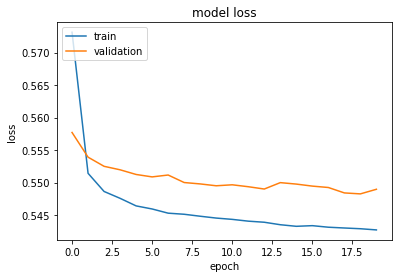

In [130]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

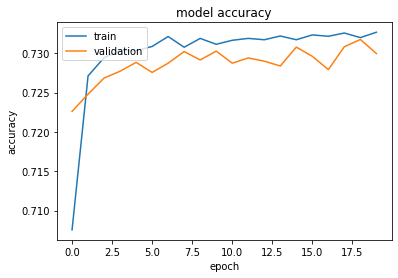

In [131]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
prid_2 = model_2.predict(X_test)

In [0]:
prid_2

In [0]:
y_pred_2 = (prid_2 > 0.5)

In [0]:
new_df = pd.DataFrame(y_pred_2, columns=['a'])

In [0]:
new_df

In [0]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense

model2 = Sequential()
model2.add(Dense(12, input_shape=(12, ), activation='sigmoid', kernel_initializer='random_uniform'))
model2.output_shape

In [0]:
model2.summary()

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)